In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
import pandas as pd

sys.path.append('../../../param_search')
import param_search as ps

ps.set_verbose(False)
ps.set_backend('slurm')

In [3]:
base_dir = '2025-12-09_train' # one subject

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/one_subject.csv',
    output_func=['softplus', 'pow10'],
    output_scale=[1.0, 1000.],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid)

16

In [4]:
base_dir = '2025-12-16_train' # ten subjects

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_bias={output_bias} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/ten_subjects.csv',
    output_func=['pow10'],
    output_bias=[1.0, 3.0],
    output_scale=[1.0, 0.1],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid)

16

In [5]:
base_dir = '2025-01-05_train' # full dataset

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_bias={output_bias} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/subjects.csv',
    variant='2025-01-05',
    output_func=['pow10'],
    output_bias=[1.0, 3.0],
    output_scale=[1.0, 0.1],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 16

16

In [4]:
base_dir = '2026-01-27_train' # new config file, updated/fixed uniform + seeded material sampling, DICE score, etc. try bounds modes.

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.bounds_mode={bounds_mode} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    bounds_mode=['hard', 'soft', 'none'],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 12

12

In [5]:
base_dir = '2026-01-28_train' # try different input shifts, revert output shift/scale

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.output_shift={output_shift} \\
    --set training.model.output_scale={output_scale} \\
    --set training.model.input_shift={input_shift} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    output_mode='basic',
    output_shift=[3.0],
    output_scale=[0.1],
    input_shift=[0.0, 1.0],
    supervised=[True, False],
    rho_known=[True, False],
) + ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    output_mode='stats',
    output_shift=[3.4863],
    output_scale=[0.3271],
    input_shift=[0.0, 1.0],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 16

16

In [20]:
#base_dir = '2026-02-02_train' # new config file: batch size 2, input normalization + output heads, segmentation, model arch
#base_dir = '2026-02-04_train' # task spec- segmentation and other tasks, compare dataset size. lr 1e-3, batch size 1.
#base_dir = '2026-02-05_train' # same tasks + data sizes, try noise less variant + augmentation, eval on train.
#base_dir = '2026-02-10_train' # RGB image generation variants- mesh alignment was broken by data augmentation.
base_dir = '2026-02-17_train' # fixed data augmentation, multi-param prediction tasks. full dataset only.

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --cpus-per-task=5
#SBATCH --mem=63000M
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects=/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/{subjects} \\
    --set dataset.selectors.input_image={image} \\
    --set training.task.inputs=[{input}] \\
    --set training.task.targets=[{target}] \\
    --set training.task.losses={{}} \\
    --set training.task.losses.{loss_target}={loss} \\
    --set training.trainer.num_epochs={epochs}

'''
name_format = '{params_hash}'

base = dict(
    config='2026-02-02_config.yaml',
    subjects='2026-01-26_preprocessed.csv',
    epochs=100
)

tasks = [
    ('image', 'material', 'CE'),
    ('image', 'E', 'MSE'),
    ('image', 'E', 'sim'),
    ('image', 'E,nu', 'sim'),
    ('image', 'E,rho', 'sim'),
    ('image', 'E,nu,rho', 'sim')
]
grid = []

for image in ['min_max-0', 'mean_std-0', 'min_max-1', 'mean_std-1']:
    for task in tasks:
        p = base.copy()
        p['image']  = image
        p['input']  = task[0]
        p['target'] = task[1]
        p['loss_target'] = task[1].split(',')[0]
        p['loss']   = task[2]
        print(p)
        grid.append(p)

len(grid)

{'config': '2026-02-02_config.yaml', 'subjects': '2026-01-26_preprocessed.csv', 'epochs': 100, 'image': 'min_max-0', 'input': 'image', 'target': 'material', 'loss_target': 'material', 'loss': 'CE'}
{'config': '2026-02-02_config.yaml', 'subjects': '2026-01-26_preprocessed.csv', 'epochs': 100, 'image': 'min_max-0', 'input': 'image', 'target': 'E', 'loss_target': 'E', 'loss': 'MSE'}
{'config': '2026-02-02_config.yaml', 'subjects': '2026-01-26_preprocessed.csv', 'epochs': 100, 'image': 'min_max-0', 'input': 'image', 'target': 'E', 'loss_target': 'E', 'loss': 'sim'}
{'config': '2026-02-02_config.yaml', 'subjects': '2026-01-26_preprocessed.csv', 'epochs': 100, 'image': 'min_max-0', 'input': 'image', 'target': 'E,nu', 'loss_target': 'E', 'loss': 'sim'}
{'config': '2026-02-02_config.yaml', 'subjects': '2026-01-26_preprocessed.csv', 'epochs': 100, 'image': 'min_max-0', 'input': 'image', 'target': 'E,rho', 'loss_target': 'E', 'loss': 'sim'}
{'config': '2026-02-02_config.yaml', 'subjects': '2026-

24

In [21]:
%autoreload
try:
    jobs = ps.setup(base_dir, template, name_format, grid, overwrite=True)
except OSError:
    jobs = ps.load(base_dir)

jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params_json,params_hash,params.config,params.subjects,params.epochs,params.image,params.input,params.target,params.loss_target,params.loss
0,7ed84067af398db2,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",7ed84067af398db2,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,material,material,CE
1,d8d8540d4a5e8449,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",d8d8540d4a5e8449,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,E,E,MSE
2,068c9f6c6a418c2b,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",068c9f6c6a418c2b,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,E,E,sim
3,7baad4dac645ebf2,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",7baad4dac645ebf2,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,"E,nu",E,sim
4,2f7019ee551c8823,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",2f7019ee551c8823,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,"E,rho",E,sim
5,cd9a8b4e4b9c054a,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",cd9a8b4e4b9c054a,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,"E,nu,rho",E,sim
6,dff42a0927c7fb31,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",dff42a0927c7fb31,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,mean_std-0,image,material,material,CE
7,6811825c11a542dd,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",6811825c11a542dd,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,mean_std-0,image,E,E,MSE
8,e5b487e6f6d27d38,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",e5b487e6f6d27d38,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,mean_std-0,image,E,E,sim
9,70472b660fc073fd,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",70472b660fc073fd,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,mean_std-0,image,"E,nu",E,sim


In [16]:
%autoreload
jobs = ps.recover(jobs)
jobs = ps.status(jobs)
jobs = ps.history(jobs)
jobs = ps.collect(jobs)
jobs.groupby(['job_state']).count()

,job_name,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,script_path,...,params.loss_target,params.loss,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
job_state,,,,,,,,,,,,,,,,,,,,,
FAILED,18,18,18,18,18,18,18,18,18,18,...,18,18,0,1,18,18,18,18,0,0
RUNNING,6,6,6,6,6,6,6,6,6,6,...,6,6,0,6,6,0,0,6,0,0


In [17]:
query_jobs = jobs[jobs.job_state == 'FAILED']
query_jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.loss_target,params.loss,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
0,7ed84067af398db2,FAILED,1,37630665,v023,00:04:25,heads.material.conv.bias ...,"^^^^^^^^^^^^^^^^^^^^^\n File ""/oce...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,material,CE,NaN,NaN,history,True,2026-02-18T17:27:00,False,<NA>,<NA>
1,d8d8540d4a5e8449,FAILED,1,37630666,v003,00:01:29,heads.E.conv.bias ...,"^^^^^^^^^^^^^^^^^^^^^\n File ""/oce...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,E,MSE,NaN,NaN,history,True,2026-02-18T17:27:00,False,<NA>,<NA>
2,068c9f6c6a418c2b,FAILED,1,37630667,v003,00:01:29,heads.E.conv.bias ...,"^^^^^^^^^^^^^^^^^^^^^\n File ""/oce...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,E,sim,NaN,NaN,history,True,2026-02-18T17:27:00,False,<NA>,<NA>
3,7baad4dac645ebf2,FAILED,1,37630668,v017,00:01:38,heads.nu.conv.bias ...,"^^^^^^^^^^^^^^^^^^^^^\n File ""/oce...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,E,sim,NaN,NaN,history,True,2026-02-18T17:27:00,False,<NA>,<NA>
4,2f7019ee551c8823,FAILED,1,37630669,v008,00:03:48,heads.rho.conv.bias ...,"^^^^^^^^^^^^^^^^^^^^^\n File ""/oce...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,E,sim,NaN,NaN,history,True,2026-02-18T17:27:00,False,<NA>,<NA>
5,cd9a8b4e4b9c054a,FAILED,1,37630670,v017,00:00:19,heads.rho.conv.bias ...,"^^^^^^^^^^^^^^^^^^^^^\n File ""/oce...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,E,sim,NaN,NaN,history,True,2026-02-18T17:27:00,False,<NA>,<NA>
6,dff42a0927c7fb31,FAILED,1,37630671,v014,00:03:21,heads.material.conv.bias ...,"^^^^^^^^^^^^^^^^^^^^^\n File ""/oce...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,material,CE,NaN,NaN,history,True,2026-02-18T17:27:00,False,<NA>,<NA>
7,6811825c11a542dd,FAILED,1,37630672,v017,00:00:18,heads.E.conv.bias ...,"^^^^^^^^^^^^^^^^^^^^^\n File ""/oce...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,E,MSE,NaN,NaN,history,True,2026-02-18T17:27:00,False,<NA>,<NA>
8,e5b487e6f6d27d38,FAILED,1,37630673,v021,00:01:21,heads.E.conv.bias ...,"^^^^^^^^^^^^^^^^^^^^^\n File ""/oce...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,E,sim,NaN,NaN,history,True,2026-02-18T17:27:00,False,<NA>,<NA>
9,70472b660fc073fd,FAILED,1,37630674,v021,00:01:21,heads.nu.conv.bias ...,"^^^^^^^^^^^^^^^^^^^^^\n File ""/oce...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,E,sim,NaN,NaN,history,True,2026-02-18T17:27:00,False,<NA>,<NA>


In [18]:
job = query_jobs.iloc[0]
job

job_name                                               7ed84067af398db2
job_state                                                        FAILED
n_submits                                                             1
job_id                                                         37630665
node_id                                                            v023
runtime                                                        00:04:25
stdout                heads.material.conv.bias                      ...
stderr                           ^^^^^^^^^^^^^^^^^^^^^\n  File "/oce...
base_dir              /ocean/projects/asc170022p/mtragoza/lung-proje...
work_dir              /ocean/projects/asc170022p/mtragoza/lung-proje...
script_path           /ocean/projects/asc170022p/mtragoza/lung-proje...
output_path           /ocean/projects/asc170022p/mtragoza/lung-proje...
log_dir               /ocean/projects/asc170022p/mtragoza/lung-proje...
stdout_path           /ocean/projects/asc170022p/mtragoza/lung-p

In [19]:
print(job.stderr)

           ^^^^^^^^^^^^^^^^^^^^^
  File "/ocean/projects/asc170022p/mtragoza/lung-project/project/training.py", line 287, in run_val_phase
    for i, batch in enumerate(self.val_loader):
  File "/ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 630, in __next__
    data = self._next_data()
           ^^^^^^^^^^^^^^^^^
  File "/ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 675, in _next_data
    data = _utils.pin_memory.pin_memory(data, self._pin_memory_device)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp/lib/python3.11/site-packages/torch/utils/data/_utils/pin_memory.py", line 69, in pin_memory
    clone.update({k: pin_memory(sample, device) for k, sample in data.items()})
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [22]:
#resub = (jobs.job_state == 'FAILED')
#jobs.loc[resub, 'job_id'] = pd.NA
jobs = ps.submit(jobs)
jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params_json,params_hash,params.config,params.subjects,params.epochs,params.image,params.input,params.target,params.loss_target,params.loss
0,7ed84067af398db2,SUBMITTED,1,37631114,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",7ed84067af398db2,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,material,material,CE
1,d8d8540d4a5e8449,SUBMITTED,1,37631115,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",d8d8540d4a5e8449,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,E,E,MSE
2,068c9f6c6a418c2b,SUBMITTED,1,37631116,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",068c9f6c6a418c2b,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,E,E,sim
3,7baad4dac645ebf2,SUBMITTED,1,37631117,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",7baad4dac645ebf2,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,"E,nu",E,sim
4,2f7019ee551c8823,SUBMITTED,1,37631118,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",2f7019ee551c8823,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,"E,rho",E,sim
5,cd9a8b4e4b9c054a,SUBMITTED,1,37631119,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",cd9a8b4e4b9c054a,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,min_max-0,image,"E,nu,rho",E,sim
6,dff42a0927c7fb31,SUBMITTED,1,37631120,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",dff42a0927c7fb31,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,mean_std-0,image,material,material,CE
7,6811825c11a542dd,SUBMITTED,1,37631121,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",6811825c11a542dd,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,mean_std-0,image,E,E,MSE
8,e5b487e6f6d27d38,SUBMITTED,1,37631122,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",e5b487e6f6d27d38,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,mean_std-0,image,E,E,sim
9,70472b660fc073fd,SUBMITTED,1,37631123,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,"{""config"": ""2026-02-02_config.yaml"", ""epochs"":...",70472b660fc073fd,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-26_preprocessed.csv,100,mean_std-0,image,"E,nu",E,sim


In [105]:
ps.set_verbose(True)

job_failed = jobs.job_state.isin({'FAILED', 'SUBMITTED'})
jobs.loc[job_failed, 'job_id'] = pd.NA

jobs = ps.submit(
    jobs,
    dry_run=False, 
    account='bio170034p',
    partition='BatComputer',
    gres='gpu:rtx6000:1',
    mem='64000M'
)
jobs

sbatch --output=/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/690b18d3665be16c/logs/%j.out --error=/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/690b18d3665be16c/logs/%j.err --account=bio170034p --partition=BatComputer --gres=gpu:rtx6000:1 --mem=64000M /ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/690b18d3665be16c/run.sh
Submitted batch job 37341049

sbatch --output=/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/5adcb740ee2e0667/logs/%j.out --error=/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/5adcb740ee2e0667/logs/%j.err --account=bio170034p --partition=BatComputer --gres=gpu:rtx6000:1 --mem=64000M /ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/5adcb740ee2e0667/run.sh
Submitted batch job 37341050

sbatch --output=/ocean/projects/asc170022p/mtragoza/lung-pro

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.target,params.loss,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
0,690b18d3665be16c,SUBMITTED,7,37341049,v009,8:37,Loading /ocean/projects/asc170022p/mtragoza/lu...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,material,CE,NaN,2026-02-04T04:10:09,status,True,2026-02-04T03:41:29,False,<NA>,<NA>
1,5adcb740ee2e0667,SUBMITTED,7,37341050,v002,00:03:09,Loading /ocean/projects/asc170022p/mtragoza/lu...,"Traceback (most recent call last):\n File ""/o...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSE,NaN,2026-02-04T04:07:34,history,True,2026-02-04T04:29:38,False,<NA>,<NA>
2,6619b15c5a1815c3,SUBMITTED,7,37341051,v002,8:37,Saving outputs/example_metrics.csv\nSaving out...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSE,NaN,2026-02-04T04:10:09,status,True,2026-02-04T03:51:09,False,<NA>,<NA>
3,8579f0bdd8182751,SUBMITTED,7,37341052,v003,00:05:23,Loading /ocean/projects/asc170022p/mtragoza/lu...,return _launch_integrate_kernel(\n ...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSRE,NaN,2026-02-04T03:51:09,history,True,2026-02-04T04:29:38,False,<NA>,<NA>
4,b9ca463f8ca2bd39,RUNNING,6,37338216,v013,8:06,40 40 val 0 ... 0.910998 ...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,SIM,NaN,2026-02-04T04:29:38,status,True,2026-02-04T04:07:34,False,<NA>,<NA>
5,7a0398a45ed8cd70,RUNNING,6,37338217,v014,6:19:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,material,CE,NaN,2026-02-04T10:40:49,status,True,2026-02-04T03:41:29,False,<NA>,<NA>
6,2b0ceae37bb84b28,SUBMITTED,7,37341053,v017,00:03:43,Loading /ocean/projects/asc170022p/mtragoza/lu...,"Traceback (most recent call last):\n File ""/o...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSE,NaN,2026-02-04T03:45:41,history,True,2026-02-04T04:29:38,False,<NA>,<NA>
7,90eec7f1dc180da6,RUNNING,6,37338219,v015,6:19:17,[Epoch 127 | Val batch 2/5] loss = 5.4137e-02 ...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSE,NaN,2026-02-04T10:40:49,status,True,2026-02-04T03:51:09,False,<NA>,<NA>
8,d7798a44ed7aef06,RUNNING,6,37338220,v015,6:19:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSRE,NaN,2026-02-04T10:40:49,status,True,2026-02-04T04:10:09,False,<NA>,<NA>
9,0dc7849b822b556a,RUNNING,6,37338221,v016,8:06,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,SIM,NaN,2026-02-04T04:29:38,status,True,2026-02-04T04:07:34,False,<NA>,<NA>


In [13]:
sys.path.append('../..')
import project.visual.matplotlib as mpl_viz
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# load training jobs

#base_dir = '2026-02-04_train' # task spec- segmentation and other tasks, compare dataset size. lr 1e-3, batch size 1.
#base_dir = '2026-02-05_train' # same tasks + data sizes, try noise less variant + augmentation, eval on train.
base_dir = '2026-02-10_train'

jobs_t = ps.load(base_dir)
ex_df_t = ps.outputs(jobs_t, skip_errors=True, output_name='outputs/example_metrics.csv')
mat_df_t = ps.outputs(jobs_t, skip_errors=True, output_name='outputs/material_metrics.csv')

In [15]:
param_cols = ['params.subjects', 'params.epochs', 'params.input', 'params.target', 'params.loss', 'params.image']

ex_df_t.groupby(param_cols + ['phase'])[['epoch', 'step']].max()

epoch  \
params.subjects  params.epochs params.input params.target params.loss params.image phase          
100_subjects.csv 250           image        logE          MSE         mean_std-0   train    220   
                                                                                   val      221   
                                                                      mean_std-1   train    212   
                                                                                   val      213   
                                                                      min_max-0    train    219   
...                                                                                         ...   
ten_subjects.csv 500           image        material      CE          min_max-0    train    499   
                                                                                   val      500   
                                                                      min_max-1    test     500   
                                                                                   train    499   
                                                                                   val      500   

                                                                                           step  
params.subjects  params.epochs params.input params.target params.loss params.image phase         
100_subjects.csv 250           image        logE          MSE         mean_std-0   train  15028  
                                                                                   val    15028  
                                                                      mean_std-1   train  14484  
                                                                                   val    14484  
                                                                      min_max-0    train  14960  
...                                                                                         ...  
ten_subjects.csv 500           image        material      CE          min_max-0    train   3500  
                                                                                   val     3500  
                                                                      min_max-1    test    3500  
                                                                                   train   3500  
                                                                                   val     3500  

[83 rows x 2 columns]

In [16]:
def assign_cols(row):
    data_path = row['params.subjects']
    data_size = {
        'one_subject.csv': 1,
        'two_subjects.csv': 2,
        'ten_subjects.csv': 10,
        '100_subjects.csv': 100,
        '2026-01-26_preprocessed.csv': 1000
    }[data_path]

    input_ = row['params.input']
    target = row['params.target']
    loss   = row['params.loss']
    
    return data_size, (input_, target, loss)

ex_df_t[['data_size', 'task_spec']] = ex_df_t.apply(assign_cols, axis=1, result_type='expand')
ex_df_t

,epoch,phase,batch,step,loss,loss_base,loss_ratio,subject,num_voxels,source_path,...,u_cell.rms,u_cell.rmse,u_cell.nrmse,u_cell.srmse,u_cell.pcorr,u_cell.scorr,res_cell.mean,res_cell.rms,data_size,task_spec
0,0,val,0,0,3.061412,1.79176,1.708606e+00,wss.18f4a9ed04407da57bd55ed4ce08f048,220478,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,"(image, material, CE)"
1,1,val,0,7,1.954913,1.79176,1.091058e+00,wss.18f4a9ed04407da57bd55ed4ce08f048,220478,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,"(image, material, CE)"
2,2,val,0,14,1.363742,1.79176,7.611189e-01,wss.18f4a9ed04407da57bd55ed4ce08f048,220478,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,"(image, material, CE)"
3,3,val,0,21,1.922284,1.79176,1.072847e+00,wss.18f4a9ed04407da57bd55ed4ce08f048,220478,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,"(image, material, CE)"
4,4,val,0,28,1.726957,1.79176,9.638327e-01,wss.18f4a9ed04407da57bd55ed4ce08f048,220478,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,"(image, material, CE)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433444,23,train,619,14972,0.072515,0.00000,7.251513e+10,wss.4379bb99731e186e1b7240bec20d2c91,969431,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,0.094257,0.029228,0.266862,0.430493,0.958776,0.876362,0.781718,1.730010,1000,"(image, logE, sim)"
433445,23,train,620,14973,0.082422,0.00000,8.242190e+10,wss.ed1b5115f9aedd695c3e27cf684fad1e,343250,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,0.004718,0.001743,0.285553,0.367613,0.977427,0.934342,0.133153,0.201594,1000,"(image, logE, sim)"
433446,23,train,621,14974,0.020250,0.00000,2.024950e+10,wss.8df732a79dc7d0e75ce473ef7d28f29a,371565,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,0.000299,0.000048,0.142959,0.252126,0.992244,0.990435,0.000950,0.001717,1000,"(image, logE, sim)"
433447,23,train,622,14975,0.037145,0.00000,3.714472e+10,wss.c30697fdfafb72ec65a958985090332e,181171,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,0.031440,0.006404,0.189855,0.325262,0.971697,0.938899,1.099705,1.834898,1000,"(image, logE, sim)"


In [17]:
import numpy as np

x_col = 'step'
y_col = 'loss'
hue_col = 'phase'
row_col = 'data_size'
col_col = 'task_spec'

row_vals = np.unique(ex_df_t[row_col])
col_vals = np.unique(ex_df_t[col_col])

row_vals, col_vals

(array([  10,  100, 1000]),
 array([('image', 'logE', 'MSE'), ('image', 'logE', 'sim'),
        ('image', 'material', 'CE')], dtype=object))

/var/tmp/ipykernel_71938/811977472.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


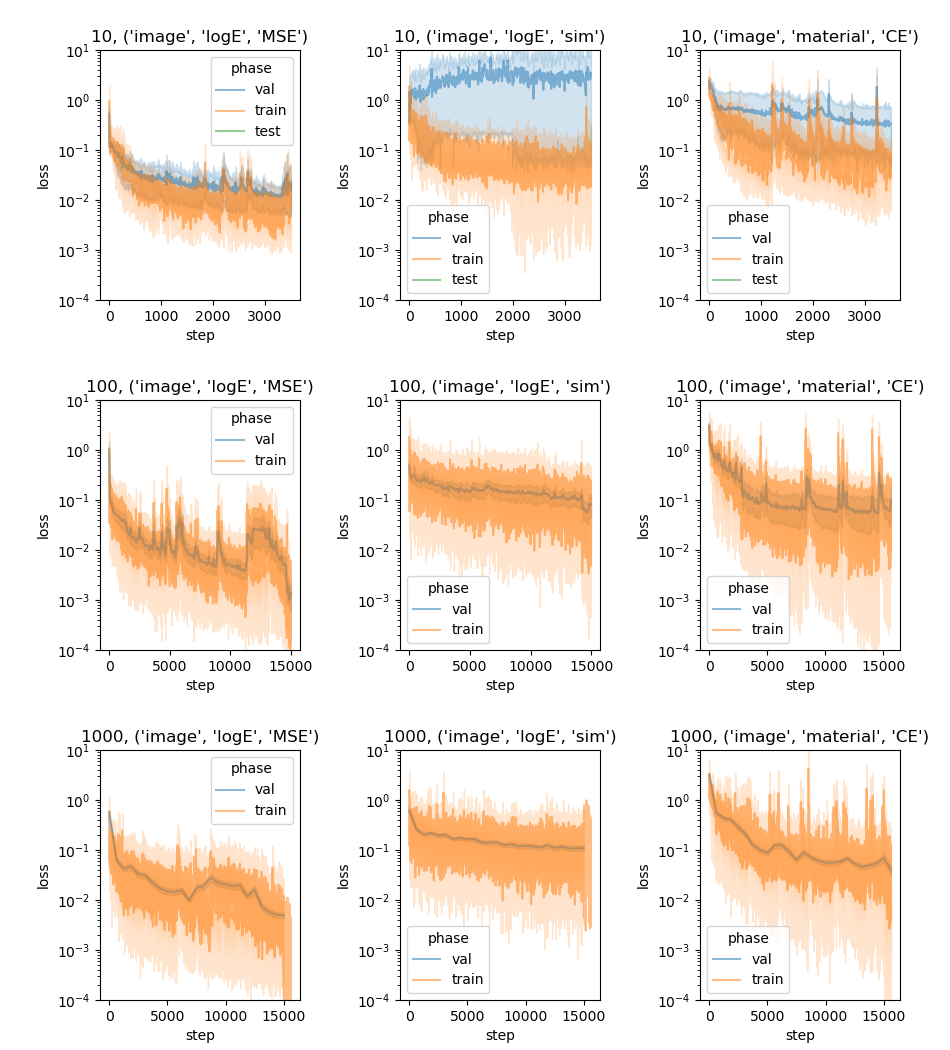

In [19]:
import project
import project.visual.matplotlib as mpl_viz

n_rows = len(row_vals)
n_cols = len(col_vals)

fig, axes = mpl_viz.subplot_grid(
    n_rows, n_cols, ax_width=2, ax_height=2.5, spacing=(1.0, 1.0), padding=(1.0, 0.5, 0.5, 0.5)
)

for i in range(n_rows):
    for j in range(n_cols):
        row_val = row_vals[i]
        col_val = col_vals[j]        
        sns.lineplot(
            ex_df_t[
                (ex_df_t[row_col] == row_val) &
                (ex_df_t[col_col] == col_val)
            ],
            x=x_col,
            y=y_col,
            hue=hue_col,
            ax=axes[i,j],
            alpha=0.5
        )
        axes[i,j].set_title(f'{row_val}, {col_val}')
        axes[i,j].set_yscale('log')
        axes[i,j].set_ylim(1e-4, 10)

fig.tight_layout()

In [48]:
jobs_t[
    (jobs_t['params.subjects'] == '100_subjects.csv') &
    (jobs_t['params.loss'] == 'sim') &
    (jobs_t['params.augment'] == True)
]

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.loss,params.augment,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
22,a093118ccf648427,RUNNING,1,37366537,v022,15:28:42,"viewer: {'t_delta': 0.0004, 'curr_alloc': 0.01...",ax.set_yscale('log')\n/ocean/projects/asc170...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,True,NaN,2026-02-06T12:03:14,status,None,None,False,None,None


In [49]:
job_name = 'a093118ccf648427'

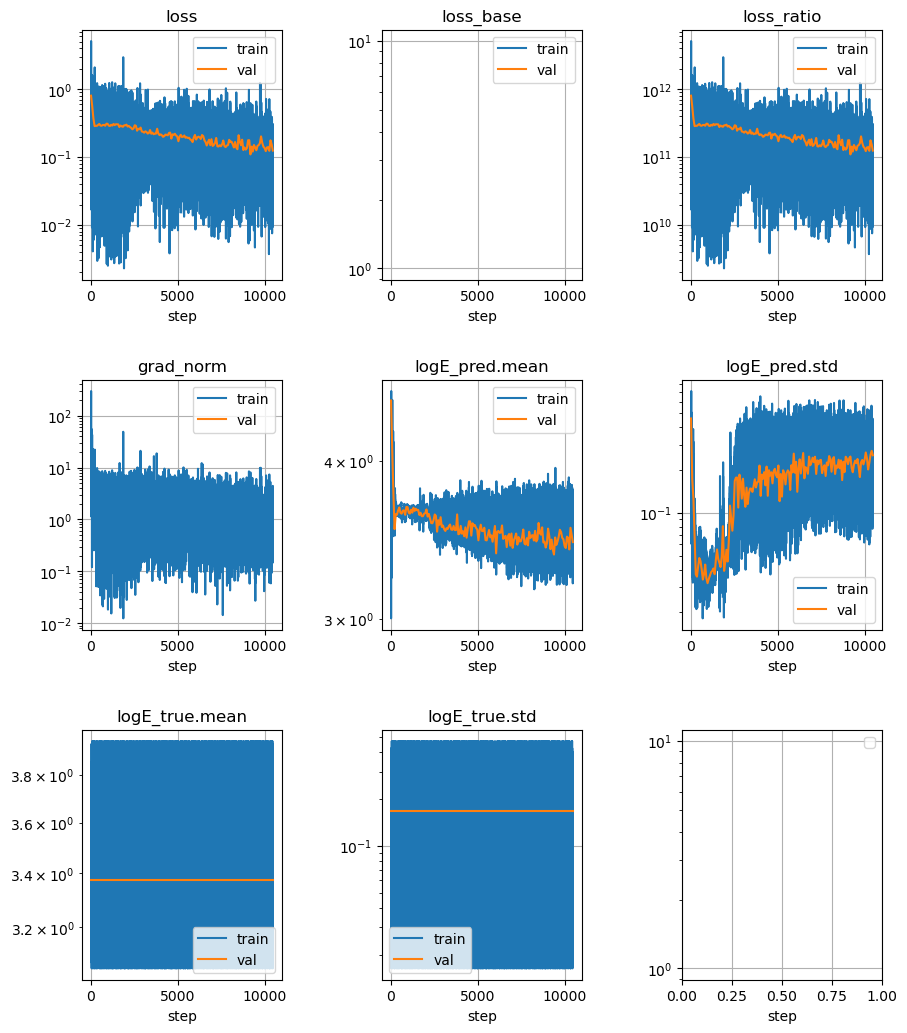

In [53]:
Image(filename=f'2026-02-05_train/{job_name}/outputs/training_plot.png') 

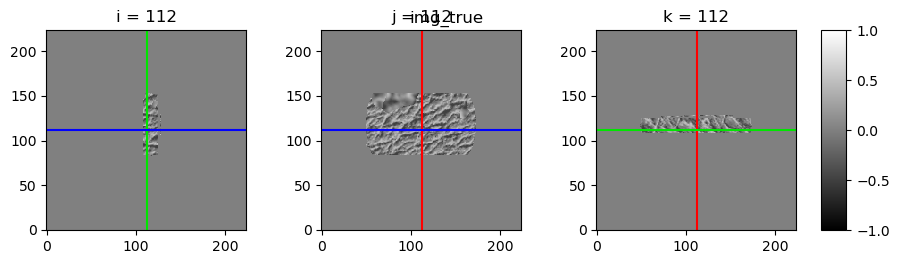

In [50]:
from IPython.display import Image
Image(filename=f'2026-02-05_train/{job_name}/outputs/img_true_viewer.png') 

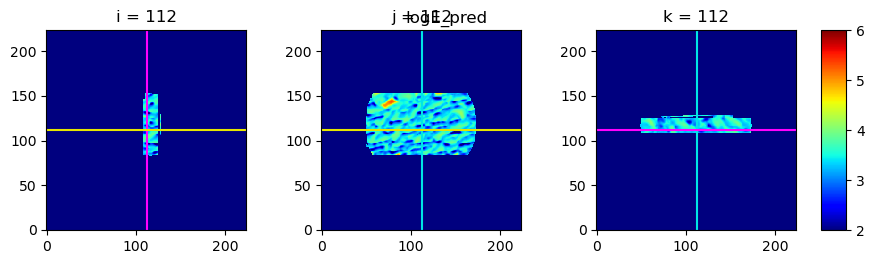

In [51]:
Image(filename=f'2026-02-05_train/{job_name}/outputs/logE_pred_viewer.png') 

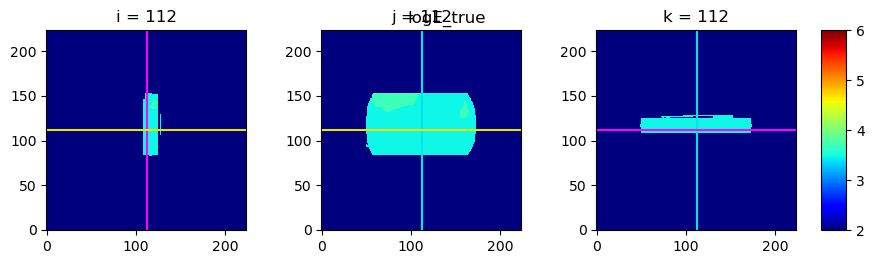

In [52]:
Image(filename=f'2026-02-05_train/{job_name}/outputs/logE_true_viewer.png') 

In [15]:
# load optimization baseline
jobs_o = ps.load('2026-01-26_optimize')
ex_df_o = ps.outputs(jobs_o,  output_name='outputs/example_metrics.csv')
mat_df_o = ps.outputs(jobs_o,  output_name='outputs/material_metrics.csv')

In [16]:
def parse_subjects(path, prefix):
    import ast
    with open(path) as f:
        for line in f:
            if line.startswith(prefix):
                subjs = line[len(prefix):].strip()
                return ast.literal_eval(subjs)

test_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Test subjects:')
test_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Test subjects:')
print(len(test_set1), len(test_set2), test_set1 == test_set2)

val_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Val subjects:')
val_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Val subjects:')
print(len(val_set1), len(val_set2), val_set1 == val_set2)

train_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Train subjects:')
train_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Train subjects:')
print(len(train_set1), len(train_set2), train_set1 == train_set2)

195 195 True
91 91 False
624 624 False


In [17]:
import project

config = project.core.fileio.load_config('2026-01-15_config.yaml')
config['dataset']['examples']['subjects'] = \
    '/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv'

examples = project.api.get_examples(config['dataset'])

bad_set = set()
for ex in examples:
    if all(c.startswith('_') for c in ex.metadata['category']):
        bad_set.add(ex.subject)

len(bad_set)

Loading 2026-01-15_config.yaml
Gathering examples


35

In [18]:
len(train_set1) + len(val_set1) + len(test_set1) + len(bad_set)

945

In [19]:
len(train_set1) + len(val_set1)

715

In [24]:
ex_df_t.groupby(['params.supervised', 'params.rho_known', 'params.input_shift', 'params.output_mode', 'epoch', 'phase']).count()

batch  \
params.supervised params.rho_known params.input_shift params.output_mode epoch phase          
False             False            0.0                basic              0     val       91   
                                                                         1     val       91   
                                                                         2     val       91   
                                                                         3     val       91   
                                                                         4     val       91   
...                                                                                     ...   
True              True             1.0                stats              17    val       91   
                                                                         18    val       91   
                                                                         19    val       91   
                                                                         20    test     195   
                                                                               val       91   

                                                                                      step  \
params.supervised params.rho_known params.input_shift params.output_mode epoch phase         
False             False            0.0                basic              0     val      91   
                                                                         1     val      91   
                                                                         2     val      91   
                                                                         3     val      91   
                                                                         4     val      91   
...                                                                                    ...   
True              True             1.0                stats              17    val      91   
                                                                         18    val      91   
                                                                         19    val      91   
                                                                         20    test    195   
                                                                               val      91   

                                                                                      loss  \
params.supervised params.rho_known params.input_shift params.output_mode epoch phase         
False             False            0.0                basic              0     val      91   
                                                                         1     val      91   
                                                                         2     val      91   
                                                                         3     val      91   
                                                                         4     val      91   
...                                                                                    ...   
True              True             1.0                stats              17    val      91   
                                                                         18    val      91   
                                                                         19    val      91   
                                                                         20    test    195   
                                                                               val      91   

                                                                                      subject  \
params.supervised params.rho_known params.input_shift params.output_mode epoch phase            
False             False            0.0                basic              0     val         91   
                                                                         1     val         91   
                

In [26]:
ex_df_o['val_subject'] = ~ex_df_o['params.subject'].isin(test_set1 | bad_set)

ex_df_o.groupby(['params.rho_known', 'val_subject']).count()

epoch  phase  batch  step  loss  subject  \
params.rho_known val_subject                                             
False            False          230    230    230   230   230      230   
                 True           715    715    715   715   715      715   
True             False          230    230    230   230   230      230   
                 True           715    715    715   715   715      715   

                              num_voxels  E_vox.mean  E_vox.rms  E_vox.rmse  \
params.rho_known val_subject                                                  
False            False               230         230        230         230   
                 True                715         715        715         715   
True             False               230         230        230         230   
                 True                715         715        715         715   

                              ...  u_cell.scorr  res_cell.mean  res_cell.rms  \
params.rho_known val_subject  ...                                              
False            False        ...           230            230           230   
                 True         ...           715            715           715   
True             False        ...           230            230           230   
                 True         ...           715            715           715   

                              source_path  job_name  job_id  params_hash  \
params.rho_known val_subject                                               
False            False                230       230     230          230   
                 True                 715       715     715          715   
True             False                230       230     230          230   
                 True                 715       715     715          715   

                              params.subject  params.variant  params.config  
params.rho_known val_subject                                                 
False            False                   230             230            230  
                 True                    715             715            715  
True             False                   230             230            230  
                 True                    715             715            715  

[4 rows x 46 columns]

In [27]:
%autoreload
ex_df = pd.concat([
    ex_df_t[(ex_df_t.epoch == 20) & (ex_df_t.phase == 'val')],
    ex_df_o[ex_df_o.subject.isin(val_set1)]
])
ex_df['params.supervised'] = ex_df['params.supervised'].astype(bool)
ex_df['params.rho_known']  = ex_df['params.rho_known'].astype(bool)

ex_df['method'] = 'unknown'
ex_df.loc[(ex_df.phase == 'optimize'), 'method'] = 'FEM-opt'
ex_df.loc[(ex_df.phase != 'optimize') & ex_df['params.supervised'], 'method'] = 'sup-DL'
ex_df.loc[(ex_df.phase != 'optimize') & ~ex_df['params.supervised'], 'method'] = 'FEM-DL'

ex_df.groupby(['method', 'params.rho_known']).describe()

epoch                                           \
                          count  mean  std   min   25%   50%   75%   max   
method  params.rho_known                                                   
FEM-DL  False             364.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0   
        True              364.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0   
FEM-opt False              91.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
        True               91.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
sup-DL  False             364.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0   
        True              364.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0   

                          batch        ... params.output_scale          \
                          count  mean  ...                 75%     max   
method  params.rho_known               ...                               
FEM-DL  False             364.0  45.0  ...              0.3271  0.3271   
        True              364.0  45.0  ...              0.3271  0.3271   
FEM-opt False              91.0   0.0  ...                 NaN     NaN   
        True               91.0   0.0  ...                 NaN     NaN   
sup-DL  False             364.0  45.0  ...              0.3271  0.3271   
        True              364.0  45.0  ...              0.3271  0.3271   

                         params.input_shift                                \
                                      count mean       std  min  25%  50%   
method  params.rho_known                                                    
FEM-DL  False                         364.0  0.5  0.500688  0.0  0.0  0.5   
        True                          364.0  0.5  0.500688  0.0  0.0  0.5   
FEM-opt False                           0.0  NaN       NaN  NaN  NaN  NaN   
        True                            0.0  NaN       NaN  NaN  NaN  NaN   
sup-DL  False                         364.0  0.5  0.500688  0.0  0.0  0.5   
        True                          364.0  0.5  0.500688  0.0  0.0  0.5   

                                    
                          75%  max  
method  params.rho_known            
FEM-DL  False             1.0  1.0  
        True              1.0  1.0  
FEM-opt False             NaN  NaN  
        True              NaN  NaN  
sup-DL  False             1.0  1.0  
        True              1.0  1.0  

[6 rows x 320 columns]

In [28]:
%autoreload
mat_df = pd.concat([
    mat_df_t[(mat_df_t.epoch == 20) & (mat_df_t.phase == 'val')],
    mat_df_o[mat_df_o.subject.isin(val_set1)]
])
mat_df['params.rho_known']  = mat_df['params.rho_known'].astype(bool)
mat_df['params.supervised'] = mat_df['params.supervised'].astype(bool)

mat_df['method'] = 'unknown'
mat_df.loc[(mat_df.phase == 'optimize'), 'method'] = 'FEM-opt'
mat_df.loc[(mat_df.phase != 'optimize') &  mat_df['params.supervised'], 'method'] = 'sup-DL'
mat_df.loc[(mat_df.phase != 'optimize') & ~mat_df['params.supervised'], 'method'] = 'FEM-DL'
mat_df['method'].unique()

mat_df.groupby(['method', 'params.rho_known', 'material']).describe()

epoch                                     \
                                   count  mean  std   min   25%   50%   75%   
method  params.rho_known material                                             
FEM-DL  False            1         224.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         2         224.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         3         221.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         4         205.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         5         222.0  20.0  0.0  20.0  20.0  20.0  20.0   
        True             1         238.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         2         228.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         3         206.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         4         214.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         5         222.0  20.0  0.0  20.0  20.0  20.0  20.0   
FEM-opt False            1          55.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         2          57.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         3          50.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         4          51.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         5          62.0   0.0  0.0   0.0   0.0   0.0   0.0   
        True             1          55.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         2          57.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         3          50.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         4          51.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         5          62.0   0.0  0.0   0.0   0.0   0.0   0.0   
sup-DL  False            1         220.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         2         219.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         3         210.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         4         211.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         5         214.0  20.0  0.0  20.0  20.0  20.0  20.0   
        True             1         230.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         2         228.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         3         200.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         4         215.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         5         223.0  20.0  0.0  20.0  20.0  20.0  20.0   

                                         batch             ...  \
                                    max  count       mean  ...   
method  params.rho_known material                          ...   
FEM-DL  False            1         20.0  224.0  45.995536  ...   
                         2         20.0  224.0  44.370536  ...   
                         3         20.0  221.0  43.819005  ...   
                         4         20.0  205.0  44.546341  ...   
                         5         20.0  222.0  43.049550  ...   
        True             1         20.0  238.0  45.726891  ...   
                         2         20.0  228.0  44.008772  ...   
                         3         20.0  206.0  44.825243  ...   
                         4         20.0  214.0  46.345794  ...   
                         5         20.0  222.0  45.189189  ...   
FEM-opt False            1          0.0   55.0   0.000000  ...   
                         2          0.0   57.0   0.000000  ...   
                         3          0.0   50.0   0.000000  ...   
                         4          0.0   51.0   0.000000  ...   
                         5          0.0   62.0   0.000000  ...   
        True             1          0.0   55.0   0.000000  ...   
                         2          0.0   57.0   0.000000  ...   
                         3          0.0   50.0   0.000000  ...   
                         4          0.0  

<Axes: xlabel='Count', ylabel='E_cell.nrmse'>

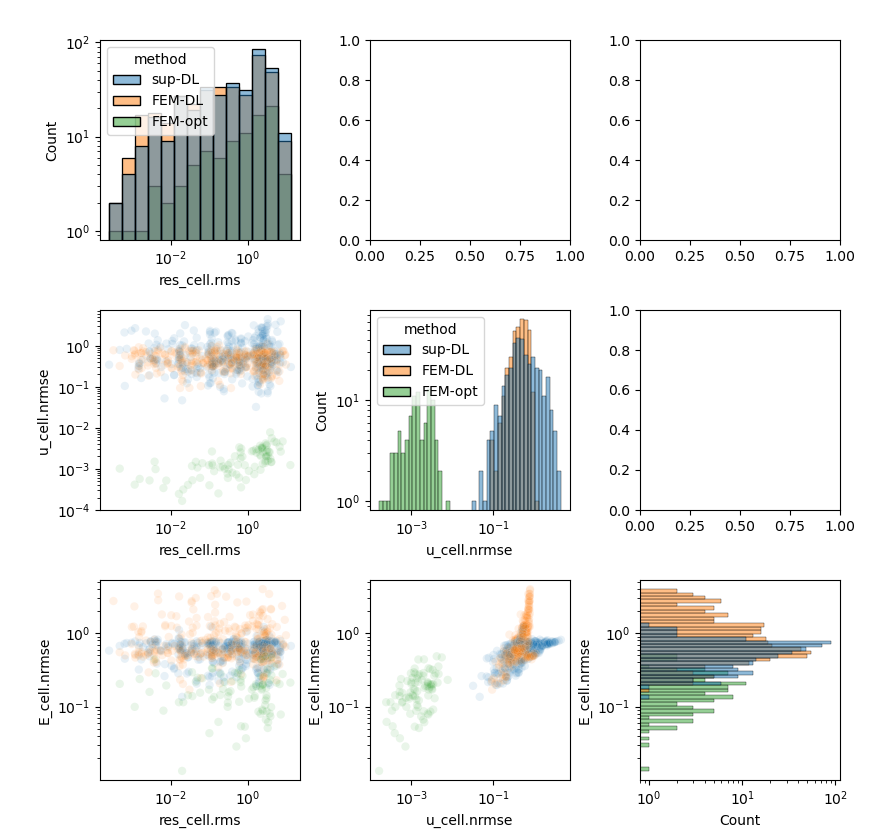

In [29]:
fig, axes = mpl_viz.subplot_grid(3, 3, ax_height=2, ax_width=2, padding=(1.0, 0.4, 0.6, 0.4), spacing=0.7) # lrbt

df = ex_df[ex_df['params.rho_known']]
hue = 'method'

ax = axes[0,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, x='res_cell.rms', hue=hue, legend=True, ax=ax)

ax = axes[1,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='res_cell.rms', y='u_cell.nrmse', hue=hue, legend=False, ax=ax, alpha=0.1)

ax = axes[2,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='res_cell.rms', y='E_cell.nrmse', hue=hue, legend=False, ax=ax, alpha=0.1)

ax = axes[1,1]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, x='u_cell.nrmse', hue=hue, legend=True, ax=ax)

ax = axes[2,1]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='u_cell.nrmse', y='E_cell.nrmse', hue=hue, legend=False, ax=ax, alpha=0.1)

ax = axes[2,2]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, y='E_cell.nrmse', hue=hue, legend=False, ax=ax)


/var/tmp/ipykernel_48480/903900530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)
/var/tmp/ipykernel_48480/903900530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)
/var/tmp/ipykernel_48480/903900530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

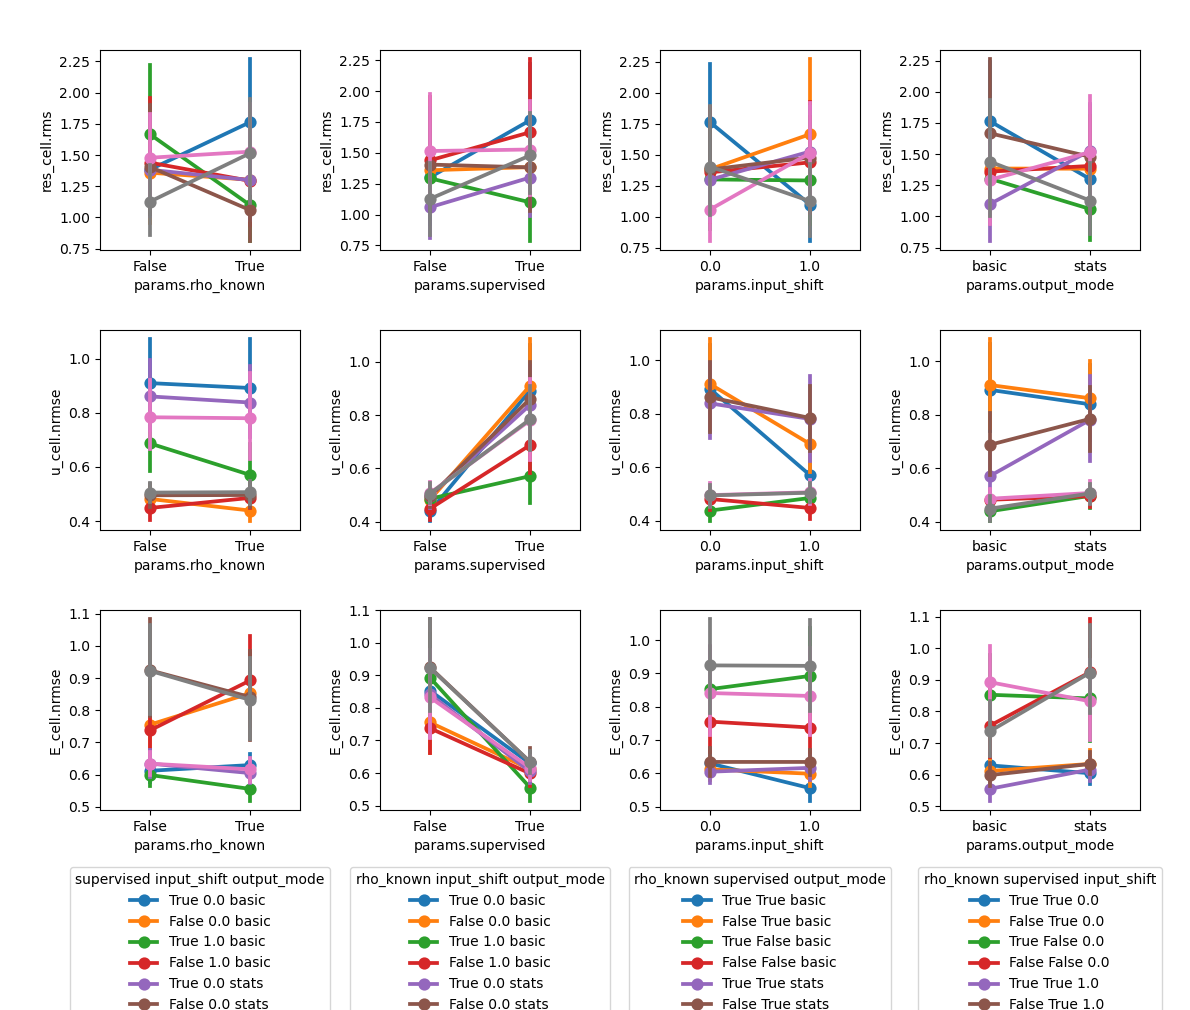

In [30]:
def add_group_column(df, cols, sep=' '):
    new_col = sep.join(cols)
    df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)
    return new_col

def plot(df, x, y):
    xs = x if isinstance(x, list) else [x]
    ys = y if isinstance(y, list) else [y]
    n_cols = len(xs)
    n_rows = len(ys)
    fig, axes = mpl_viz.subplot_grid(
        n_rows, n_cols,
        ax_height=2,
        ax_width=2,
        padding=[1.0, 0.5, 2.0, 0.5], 
        spacing=[0.8, 0.8]
    )
    for i, x in enumerate(xs):
        hue = add_group_column(df, [c for c in xs if c != x])
        for j, y in enumerate(ys):
            ax = axes[j,i]
            sns.pointplot(df, x=x, y=y, hue=hue, ax=ax, legend=True)
            ax.get_legend().remove()
            if j + 1 == n_rows:
                handles, labels = ax.get_legend_handles_labels()
                title = hue.replace('params.', '')
                ax.legend(handles, labels, loc='upper center', bbox_to_anchor=[0.5, -0.25], title=title)

plot(
    ex_df[ex_df.method != 'FEM-opt'],
    x=['params.rho_known', 'params.supervised', 'params.input_shift', 'params.output_mode'],
    y=['res_cell.rms', 'u_cell.nrmse', 'E_cell.nrmse']
)

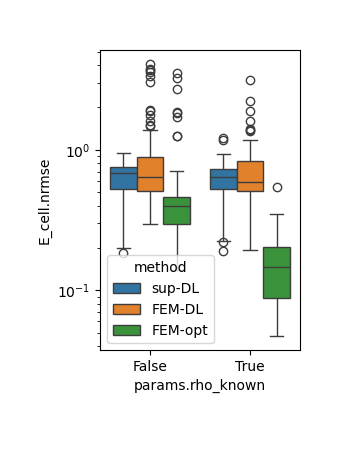

In [105]:
y_cols = ['E_cell.nrmse'] #['res_cell.rms', 'u_cell.nrmse', 'E_cell.nrmse']

fig, axes = mpl_viz.subplot_grid(
    1, len(y_cols),
    ax_height=3,
    ax_width=2,
    padding=[1.0, 0.5, 1.0, 0.5], 
    spacing=[0.75, 0.75]
)

for i, y_col in enumerate(y_cols):
    sns.boxplot(
        ex_df[
            (ex_df['params.bounds_mode'].fillna('none') == 'none')
        ],
        hue='method',
        x='params.rho_known',
        y=y_col,
        ax=axes[0,i]
    )

for ax in axes.flatten():
    ax.set_yscale('log')
    #ax.set_ylim(0.01, 10.0)
    #ax.legend(loc='upper left', title='params.supervised')

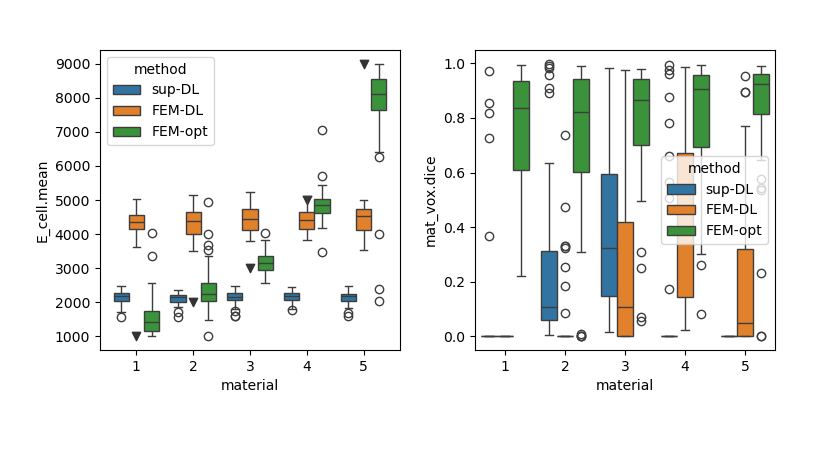

In [106]:
y_cols = ['E_cell.mean', 'mat_vox.dice'] #, 'E_cell.nrmse', 'mat_vox.dice']

fig, axes = mpl_viz.subplot_grid(
    1, len(y_cols),
    ax_height=3,
    ax_width=3,
    padding=[1.0, 0.5, 1.0, 0.5], 
    spacing=[0.75, 0.75]
)

for i, y_col in enumerate(y_cols):
    sns.boxplot(
        mat_df[mat_df['params.rho_known']],
        hue='method',
        x='material',
        y=y_col,
        ax=axes[0,i]
    )
    if y_col == 'E_cell.mean':
        axes[0,i].scatter(range(5), [1e3, 2e3, 3e3, 5e3, 9e3], marker='v', c='0.2')


In [89]:
from IPython.display import Image

In [98]:
job = jobs_t[
    jobs_t['params.rho_known'] &
    jobs_t['params.supervised'] &
    (jobs_t['params.bounds_mode'] == 'none')
].iloc[0]
job

job_name                                               099f680c4b90ae80
job_state                                                       RUNNING
n_submits                                                             1
job_id                                                         37172077
node_id                                                            v002
runtime                                                         8:54:17
stdout                Loading /ocean/projects/asc170022p/mtragoza/lu...
stderr                  self.fig.tight_layout()\n/ocean/projects/asc...
base_dir              /ocean/projects/asc170022p/mtragoza/lung-proje...
work_dir              /ocean/projects/asc170022p/mtragoza/lung-proje...
script_path           /ocean/projects/asc170022p/mtragoza/lung-proje...
output_path           /ocean/projects/asc170022p/mtragoza/lung-proje...
log_dir               /ocean/projects/asc170022p/mtragoza/lung-proje...
stdout_path           /ocean/projects/asc170022p/mtragoza/lung-p

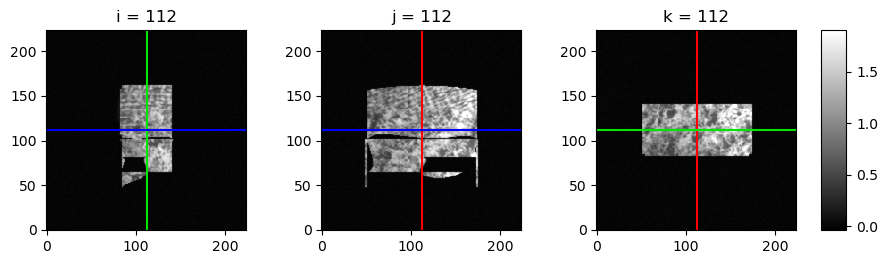

In [99]:
Image(filename=f'{job.work_dir}/outputs/image_viewer.png')

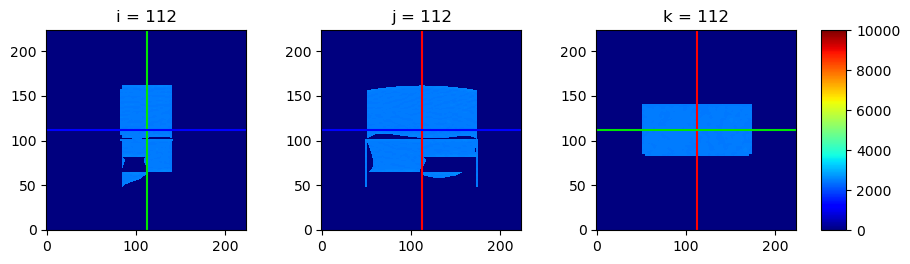

In [100]:
Image(filename=f'{job.work_dir}/outputs/E_pred_viewer.png')

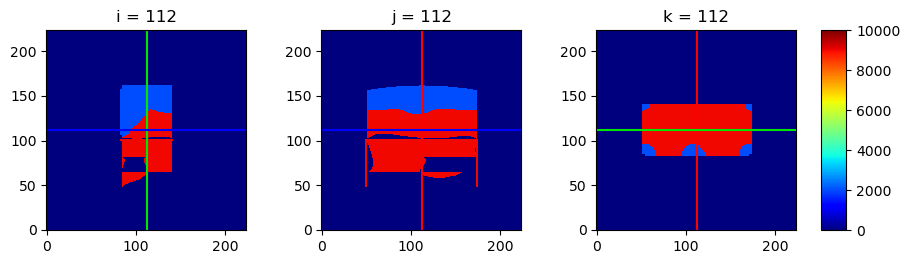

In [101]:
Image(filename=f'{job.work_dir}/outputs/E_true_viewer.png')

/var/tmp/ipykernel_82813/916136722.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  job_name = df.set_index(param_cols).loc[True, False, 3.0, 1.0].job_name.iloc[0]


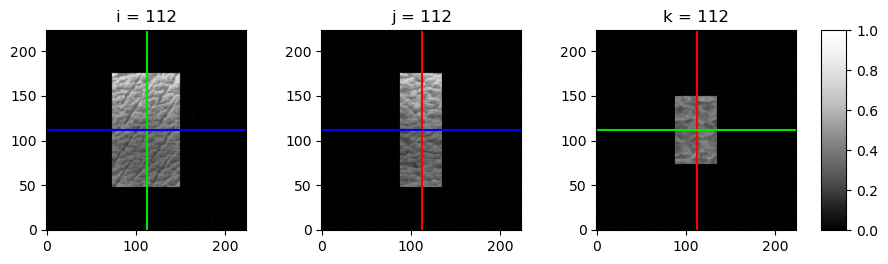

In [53]:
job_name = df.set_index(param_cols).loc[True, False, 3.0, 1.0].job_name.iloc[0]
Image(filename=f'{base_dir}/{job_name}/outputs/image_viewer.png')

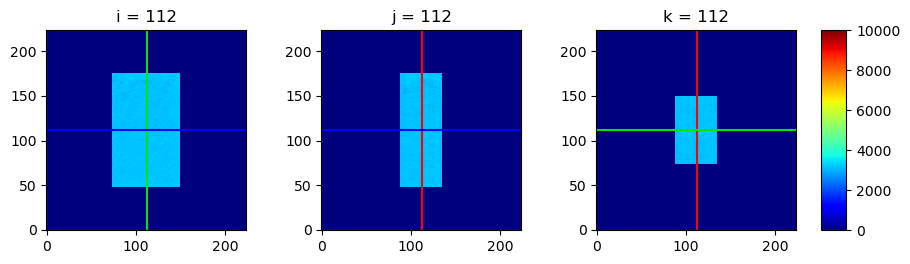

In [54]:
Image(filename=f'{base_dir}/{job_name}/outputs/E_pred_viewer.png')

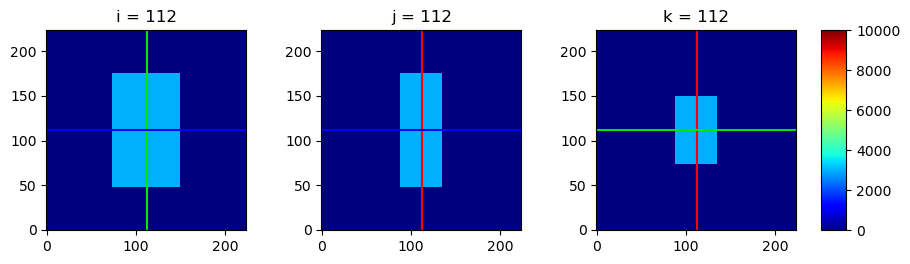

In [55]:
Image(filename=f'{base_dir}/{job_name}/outputs/E_true_viewer.png')